O caixeiro com gasolina infinita
========================================



## Introdução



O presente experimento é caracterizado por uma variação do problema do caixeiro viajante, haja visto que o caixeiro ainda deve percorrer por todas as cidades apenas uma vez, com a diferença de que deve escolher o maior caminho para isso, ao invés de escolher o menor. Como para se encontrar a melhor solução torna-se necessário passar por todas as possibilidades, o problema é do tipo não polinomial difícil.

## Objetivo



Passando por todas as cidades apenas uma vez, busca-se encontrar o maior caminho possível para se fazer isso.

## Importações



Todos os comandos de `import` devem estar dentro desta seção.



In [15]:
import time
import random
from itertools import permutations
import matplotlib.pyplot as plt
import networkx 

from funcoes import cria_cidades
from funcoes import populacao_inicial_cv as cria_populacao_inicial
from funcoes import funcao_objetivo_cv 
from funcoes import funcao_objetivo_pop_cv 
from funcoes import selecao_roleta_max as funcao_selecao
from funcoes import cruzamento_ordenado as funcao_cruzamento
from funcoes import mutacao_de_troca as funcao_mutacao

## Códigos e discussão



No problema do caixeiro viajante com minimização da distância percorrida, era necessário selecionar os indivíduos que apresentassem as menores distâncias. Porém, busca-se agora encontrar aquelas que detenham as maiores distâncias, sendo necessária a mudança da função seleção.

In [2]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES = 7
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

In [3]:
# Funções locais

def funcao_objetivo_pop(populacao):
    return funcao_objetivo_pop_cv(populacao, CIDADES)

def funcao_objetivo_individuo(individuo):
    return funcao_objetivo_cv(individuo, CIDADES)

In [4]:
# Busca por algoritmo genético

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")  # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = min(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness

In [5]:
# Busca testando todas as permutações

melhor_fitness_ever = -float("inf")

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho

In [6]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)


Melhor individuo obtido por algoritmos genéticos:
['Cidade 5', 'Cidade 3', 'Cidade 1', 'Cidade 2', 'Cidade 0', 'Cidade 6', 'Cidade 4'] com distância: 2.5978663412704575

Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 3', 'Cidade 2', 'Cidade 4', 'Cidade 1', 'Cidade 6', 'Cidade 5') com distância: 3.4267784433896904


Nota-se que os resultados de cada algoritmo diferiram-se poucoÉ ainda possível perceber que, para um número relativamente baixo de cidades, o tempo de execução do algoritmo genético foi próximo da busca exaustiva, que encontra a melhor possibilidade.

Abaixo é plotado o grafo do caminho entre as cidades.

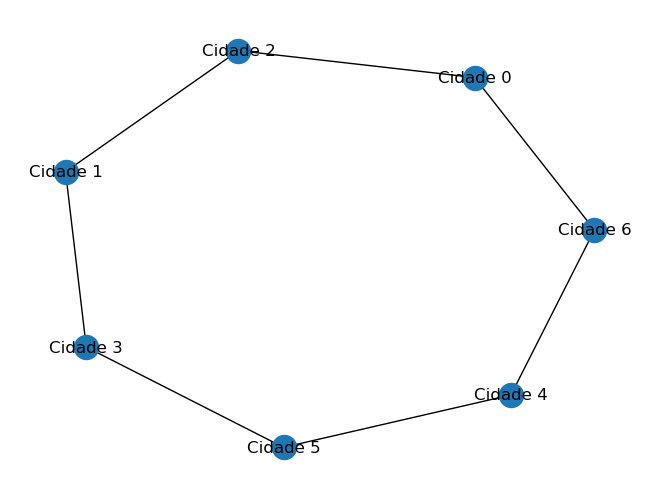

In [11]:
#Plotar o grafo

g = networkx.Graph()

for i in list(CIDADES.keys()): #Chama o dicionário
    g.add_node(i)

k = -1

while k < len(melhor_individuo_ja_visto)-1: 
    g.add_edge(melhor_individuo_ja_visto[k], melhor_individuo_ja_visto[k+1]) #ligar vértice entre as arestas adjacentes
    k+=1

vertices = CIDADES.keys()

#pos = networkx.circular_layout(g)

networkx.draw(g, with_labels = True)

Pensando que o tempo utilizado foi próximo, propõe-se o aumento da quantidade de cidades para verificar a diferença.

In [28]:
### CONSTANTES

# relacionadas à busca
TAMANHO_POP = 50
NUM_GERACOES = 1000
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.05
NUM_COMBATENTES_NO_TORNEIO = 3

# relacionadas ao problema a ser resolvido
NUMERO_DE_CIDADES = 10
CIDADES = cria_cidades(NUMERO_DE_CIDADES)

In [29]:
# Busca por algoritmo genético

i_ag = time.time()

populacao = cria_populacao_inicial(TAMANHO_POP, CIDADES)

melhor_fitness_ja_visto = -float("inf")  # é assim que escrevemos infinito em python

for n in range(NUM_GERACOES):
    
    # Seleção
    fitness = funcao_objetivo_pop(populacao)
    populacao = funcao_selecao(populacao, fitness)
    
    # Cruzamento
    pais = populacao[0::2]
    maes = populacao[1::2]
    
    contador = 0
    
    for pai, mae in zip(pais, maes):
        if random.random() <= CHANCE_CRUZAMENTO:
            filho1, filho2 = funcao_cruzamento(pai, mae)
            populacao[contador] = filho1
            populacao[contador + 1] = filho2
        
        contador = contador + 2   
        
    # Mutação
    for n in range(len(populacao)):
        if random.random() <= CHANCE_MUTACAO:
            individuo = populacao[n]
            populacao[n] = funcao_mutacao(individuo)            
            
    # melhor individuo já visto até agora
    fitness = funcao_objetivo_pop(populacao)
    maior_fitness = min(fitness)
    if maior_fitness > melhor_fitness_ja_visto:        
        posicao = fitness.index(maior_fitness)
        melhor_individuo_ja_visto = populacao[posicao]
        melhor_fitness_ja_visto = maior_fitness

f_ag = time.time()

In [22]:
# Busca testando todas as permutações

i_be = time.time()

melhor_fitness_ever = -float("inf")

# testando todas as permutações possíveis
for caminho in permutations(list(CIDADES.keys())):
    distancia = funcao_objetivo_individuo(caminho)
    if distancia > melhor_fitness_ever:
        melhor_fitness_ever = distancia
        melhor_resposta_ever = caminho
        
f_be = time.time()

In [30]:
# Checando os resultados

print()
print("Melhor individuo obtido por algoritmos genéticos:")
print(melhor_individuo_ja_visto, "com distância:", melhor_fitness_ja_visto)
print(f'Tempo utilizado {round(f_ag - i_ag,2)} segundos')

print()
print("Melhor individuo obtido por busca exaustiva:")
print(melhor_resposta_ever, "com distância:", melhor_fitness_ever)
print(f'Tempo utilizado {round(f_be - i_be,2)} segundos')


Melhor individuo obtido por algoritmos genéticos:
['Cidade 4', 'Cidade 2', 'Cidade 7', 'Cidade 1', 'Cidade 8', 'Cidade 6', 'Cidade 9', 'Cidade 0', 'Cidade 5', 'Cidade 3'] com distância: 5.608002820615281
Tempo utilizado 0.4 segundos

Melhor individuo obtido por busca exaustiva:
('Cidade 0', 'Cidade 1', 'Cidade 4', 'Cidade 9', 'Cidade 7', 'Cidade 5', 'Cidade 2', 'Cidade 3', 'Cidade 8', 'Cidade 6') com distância: 7.487375680772077
Tempo utilizado 11.7 segundos


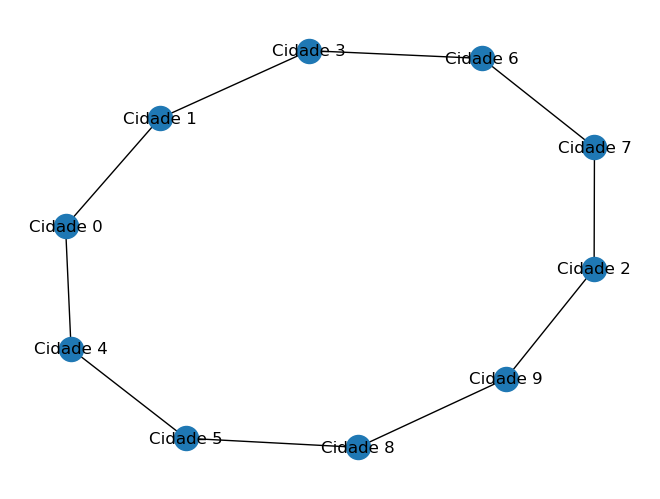

In [24]:
#Plotar o grafo

g = networkx.Graph()

for i in list(CIDADES.keys()): #Chama o dicionário
    g.add_node(i)

k = -1

while k < len(melhor_individuo_ja_visto)-1: 
    g.add_edge(melhor_individuo_ja_visto[k], melhor_individuo_ja_visto[k+1]) #ligar vértice entre as arestas adjacentes
    k+=1

vertices = CIDADES.keys()

#pos = networkx.circular_layout(g)

networkx.draw(g, with_labels = True)

## Conclusão



Para o caixeiro viajante que busca fazer o maior caminho possível, o mesmo código utilizado para o problema do caixeiro viajante que minimiza o seu caminho foi utilizado, com a diferença da função de seleção utilizada, buscando o máximo ao invés de buscar o mínimo. O algoritmo genético foi suficiente para encontrar uma distância próxima da busca exaustiva, mas com um tempo menor de execução.

Para perceber melhor diferença, propõe-se o aumento da quantidade de cidades do problema proposto, de forma a usar 10 cidades ao invés de 7. Como resultado, é possível perceber de forma clara a diferença de tempo, com um menor valor para o algoritmo genético, apesar do maior valor ter sido encontrado evidentemente pela busca exaustiva.